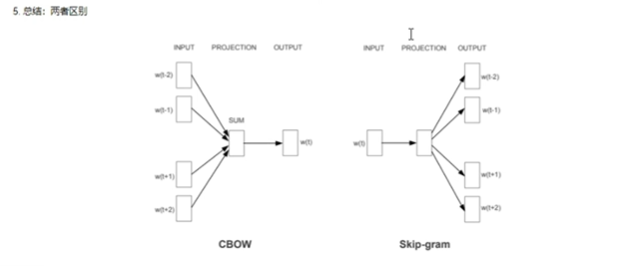

## Continuous Bag of Words (CBOW)

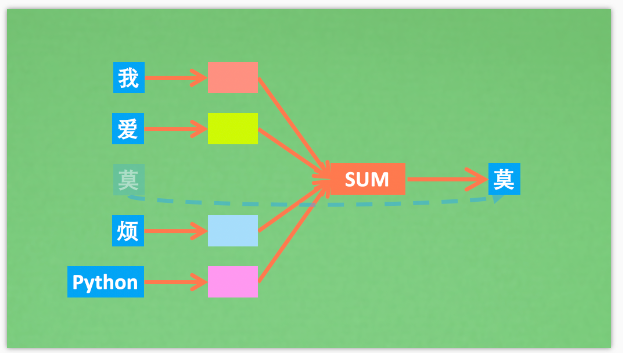

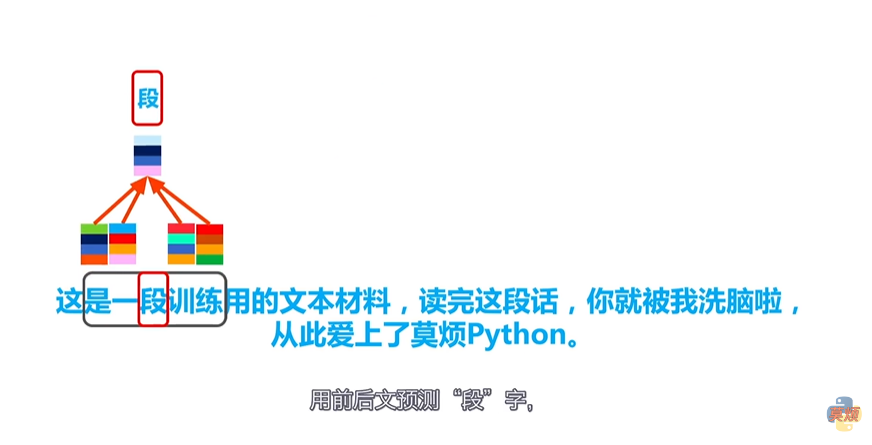

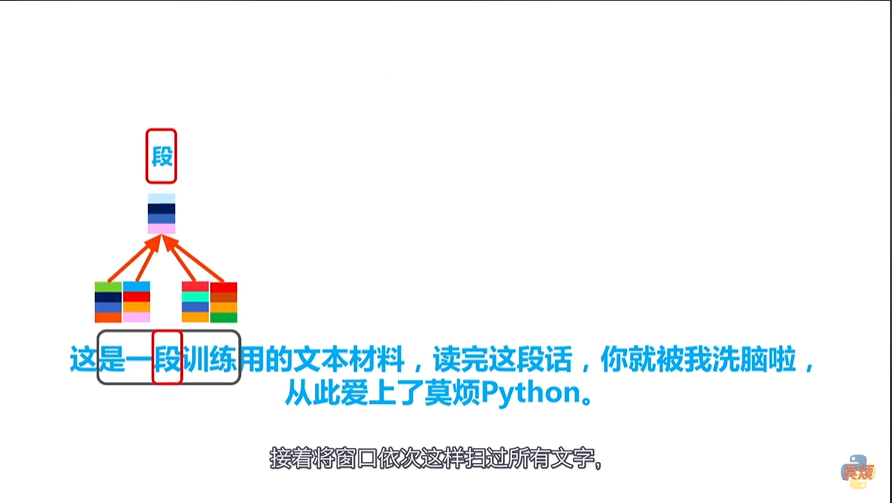

## CBOW pytorch

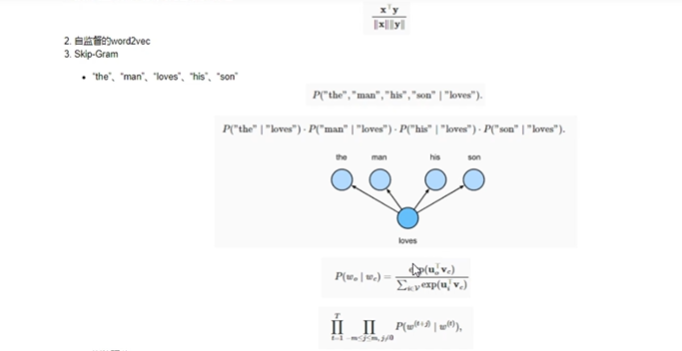

In [132]:
import torch
from torch import nn
from torch import optim
import spacy

In [133]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('正在用: {} device'.format(device))

正在用: cpu device


In [134]:
context_size = 2 #前後文兩個字，預測中間的字
embedding_sizes = 100

In [135]:
raw_text = """The Three Kingdoms (simplified Chinese: 三国; traditional Chinese: 三國; pinyin: Sān Guó) from 220 to 280 AD was the tripartite division of China among the dynastic states of Cao Wei, Shu Han, and Eastern Wu.[1] The Three Kingdoms period was preceded by the Eastern Han dynasty and was followed by the Western Jin dynasty. The short-lived state of Yan on the Liaodong Peninsula, which lasted from 237 to 238, is sometimes considered as a "4th kingdom".[2]

Academically, the period of the Three Kingdoms refers to the period between the establishment of Cao Wei in 220 and the conquest of the Eastern Wu by the Western Jin in 280. The earlier, "unofficial" part of the period, from 184 to 220, was marked by chaotic infighting between warlords in various parts of China during the downfall of the Eastern Han dynasty. The middle part of the period, from 220 to 263, was marked by a more militarily stable arrangement between three rival states of Cao Wei, Shu Han, and Eastern Wu. The later part of the era was marked by the conquest of Shu by Wei in 263, the usurpation of Cao Wei by the Western Jin in 266, and the conquest of Eastern Wu by the Western Jin in 280.

The Three Kingdoms period is one of the bloodiest in Chinese history.[3] A nationwide census taken in 280 AD, following the reunification of the Three Kingdoms under the Jin shows a total of 2,459,840 households and 16,163,863 individuals which was only a fraction of the 10,677,960 households, and 56,486,856 individuals reported during the Han era.[4] While the census may not have been particularly accurate due to a multitude of factors of the times, in 280, the Jin did make an attempt to account for all individuals where they could.[5]

Technology advanced significantly during this period. Shu chancellor Zhuge Liang invented the wooden ox, suggested to be an early form of the wheelbarrow,[6] and improved on the repeating crossbow.[7] Wei mechanical engineer Ma Jun is considered by many to be the equal of his predecessor Zhang Heng.[8] He invented a hydraulic-powered, mechanical puppet theatre designed for Emperor Ming of Wei, square-pallet chain pumps for irrigation of gardens in Luoyang, and the ingenious design of the south-pointing chariot, a non-magnetic directional compass operated by differential gears.[9]

Although relatively short, this historical period has been greatly romanticized in the cultures of China, Japan, Korea, and Vietnam.[10] It has been celebrated and popularized in operas, folk stories, novels and in more recent times, films, television, and video games. The best known of these is Luo Guanzhong's Romance of the Three Kingdoms, a Ming dynasty historical novel based on events in the Three Kingdoms period.[11] The authoritative historical record of the era is Chen Shou's Records of the Three Kingdoms, along with Pei Songzhi's later annotations of the text.

The English-language term "Three Kingdoms" is something of a misnomer, since each state was eventually headed not by a king, but by an emperor who claimed suzerainty over all China.[12] Nevertheless, the term "Three Kingdoms" has become standard among English-speaking sinologists.""" .split()

In [136]:
print(raw_text)

['The', 'Three', 'Kingdoms', '(simplified', 'Chinese:', '三国;', 'traditional', 'Chinese:', '三國;', 'pinyin:', 'Sān', 'Guó)', 'from', '220', 'to', '280', 'AD', 'was', 'the', 'tripartite', 'division', 'of', 'China', 'among', 'the', 'dynastic', 'states', 'of', 'Cao', 'Wei,', 'Shu', 'Han,', 'and', 'Eastern', 'Wu.[1]', 'The', 'Three', 'Kingdoms', 'period', 'was', 'preceded', 'by', 'the', 'Eastern', 'Han', 'dynasty', 'and', 'was', 'followed', 'by', 'the', 'Western', 'Jin', 'dynasty.', 'The', 'short-lived', 'state', 'of', 'Yan', 'on', 'the', 'Liaodong', 'Peninsula,', 'which', 'lasted', 'from', '237', 'to', '238,', 'is', 'sometimes', 'considered', 'as', 'a', '"4th', 'kingdom".[2]', 'Academically,', 'the', 'period', 'of', 'the', 'Three', 'Kingdoms', 'refers', 'to', 'the', 'period', 'between', 'the', 'establishment', 'of', 'Cao', 'Wei', 'in', '220', 'and', 'the', 'conquest', 'of', 'the', 'Eastern', 'Wu', 'by', 'the', 'Western', 'Jin', 'in', '280.', 'The', 'earlier,', '"unofficial"', 'part', 'of', 

In [137]:
raw_text2 = """The Three Kingdoms (simplified Chinese: 三国; traditional Chinese: 三國; pinyin: Sān Guó) from 220 to 280 AD was the tripartite division of China among the dynastic states of Cao Wei, Shu Han, and Eastern Wu.[1] The Three Kingdoms period was preceded by the Eastern Han dynasty and was followed by the Western Jin dynasty. The short-lived state of Yan on the Liaodong Peninsula, which lasted from 237 to 238, is sometimes considered as a "4th kingdom".[2]

Academically, the period of the Three Kingdoms refers to the period between the establishment of Cao Wei in 220 and the conquest of the Eastern Wu by the Western Jin in 280. The earlier, "unofficial" part of the period, from 184 to 220, was marked by chaotic infighting between warlords in various parts of China during the downfall of the Eastern Han dynasty. The middle part of the period, from 220 to 263, was marked by a more militarily stable arrangement between three rival states of Cao Wei, Shu Han, and Eastern Wu. The later part of the era was marked by the conquest of Shu by Wei in 263, the usurpation of Cao Wei by the Western Jin in 266, and the conquest of Eastern Wu by the Western Jin in 280.

The Three Kingdoms period is one of the bloodiest in Chinese history.[3] A nationwide census taken in 280 AD, following the reunification of the Three Kingdoms under the Jin shows a total of 2,459,840 households and 16,163,863 individuals which was only a fraction of the 10,677,960 households, and 56,486,856 individuals reported during the Han era.[4] While the census may not have been particularly accurate due to a multitude of factors of the times, in 280, the Jin did make an attempt to account for all individuals where they could.[5]

Technology advanced significantly during this period. Shu chancellor Zhuge Liang invented the wooden ox, suggested to be an early form of the wheelbarrow,[6] and improved on the repeating crossbow.[7] Wei mechanical engineer Ma Jun is considered by many to be the equal of his predecessor Zhang Heng.[8] He invented a hydraulic-powered, mechanical puppet theatre designed for Emperor Ming of Wei, square-pallet chain pumps for irrigation of gardens in Luoyang, and the ingenious design of the south-pointing chariot, a non-magnetic directional compass operated by differential gears.[9]

Although relatively short, this historical period has been greatly romanticized in the cultures of China, Japan, Korea, and Vietnam.[10] It has been celebrated and popularized in operas, folk stories, novels and in more recent times, films, television, and video games. The best known of these is Luo Guanzhong's Romance of the Three Kingdoms, a Ming dynasty historical novel based on events in the Three Kingdoms period.[11] The authoritative historical record of the era is Chen Shou's Records of the Three Kingdoms, along with Pei Songzhi's later annotations of the text.

The English-language term "Three Kingdoms" is something of a misnomer, since each state was eventually headed not by a king, but by an emperor who claimed suzerainty over all China.[12] Nevertheless, the term "Three Kingdoms" has become standard among English-speaking sinologists."""

In [138]:
nlp = spacy.load("en_core_web_sm")

In [139]:
raw_text3 = nlp(raw_text2)
print(raw_text3)

The Three Kingdoms (simplified Chinese: 三国; traditional Chinese: 三國; pinyin: Sān Guó) from 220 to 280 AD was the tripartite division of China among the dynastic states of Cao Wei, Shu Han, and Eastern Wu.[1] The Three Kingdoms period was preceded by the Eastern Han dynasty and was followed by the Western Jin dynasty. The short-lived state of Yan on the Liaodong Peninsula, which lasted from 237 to 238, is sometimes considered as a "4th kingdom".[2]

Academically, the period of the Three Kingdoms refers to the period between the establishment of Cao Wei in 220 and the conquest of the Eastern Wu by the Western Jin in 280. The earlier, "unofficial" part of the period, from 184 to 220, was marked by chaotic infighting between warlords in various parts of China during the downfall of the Eastern Han dynasty. The middle part of the period, from 220 to 263, was marked by a more militarily stable arrangement between three rival states of Cao Wei, Shu Han, and Eastern Wu. The later part of the e

In [140]:
raw_text4 = [token.text for token in nlp(raw_text2)]
print(raw_text4)

['The', 'Three', 'Kingdoms', '(', 'simplified', 'Chinese', ':', '三国', ';', 'traditional', 'Chinese', ':', '三國', ';', 'pinyin', ':', 'Sān', 'Guó', ')', 'from', '220', 'to', '280', 'AD', 'was', 'the', 'tripartite', 'division', 'of', 'China', 'among', 'the', 'dynastic', 'states', 'of', 'Cao', 'Wei', ',', 'Shu', 'Han', ',', 'and', 'Eastern', 'Wu.[1', ']', 'The', 'Three', 'Kingdoms', 'period', 'was', 'preceded', 'by', 'the', 'Eastern', 'Han', 'dynasty', 'and', 'was', 'followed', 'by', 'the', 'Western', 'Jin', 'dynasty', '.', 'The', 'short', '-', 'lived', 'state', 'of', 'Yan', 'on', 'the', 'Liaodong', 'Peninsula', ',', 'which', 'lasted', 'from', '237', 'to', '238', ',', 'is', 'sometimes', 'considered', 'as', 'a', '"', '4th', 'kingdom".[2', ']', '\n\n', 'Academically', ',', 'the', 'period', 'of', 'the', 'Three', 'Kingdoms', 'refers', 'to', 'the', 'period', 'between', 'the', 'establishment', 'of', 'Cao', 'Wei', 'in', '220', 'and', 'the', 'conquest', 'of', 'the', 'Eastern', 'Wu', 'by', 'the', '

In [141]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
nltk_stopwords = nltk.corpus.stopwords.words('english')

def text_cleaning(text):
    text = re.sub("[^a-zA-Z]", " ", text) # 去除標點符號和數字
    text = text.lower() # 轉為英文小寫
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in nltk_stopwords]
    return ' '.join(text).split()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [142]:
clean_text = text_cleaning(raw_text2)
print(clean_text)

['three', 'kingdom', 'simplified', 'chinese', 'traditional', 'chinese', 'pinyin', 'n', 'gu', 'ad', 'tripartite', 'division', 'china', 'among', 'dynastic', 'state', 'cao', 'wei', 'shu', 'han', 'eastern', 'wu', 'three', 'kingdom', 'period', 'preceded', 'eastern', 'han', 'dynasty', 'followed', 'western', 'jin', 'dynasty', 'short', 'lived', 'state', 'yan', 'liaodong', 'peninsula', 'lasted', 'sometimes', 'considered', 'th', 'kingdom', 'academically', 'period', 'three', 'kingdom', 'refers', 'period', 'establishment', 'cao', 'wei', 'conquest', 'eastern', 'wu', 'western', 'jin', 'earlier', 'unofficial', 'part', 'period', 'marked', 'chaotic', 'infighting', 'warlord', 'various', 'part', 'china', 'downfall', 'eastern', 'han', 'dynasty', 'middle', 'part', 'period', 'marked', 'militarily', 'stable', 'arrangement', 'three', 'rival', 'state', 'cao', 'wei', 'shu', 'han', 'eastern', 'wu', 'later', 'part', 'era', 'marked', 'conquest', 'shu', 'wei', 'usurpation', 'cao', 'wei', 'western', 'jin', 'conquest

In [143]:
vocab = set(clean_text)
vocab_size = len(clean_text)
vocab_size

284

In [144]:
word_to_idx = {word:idx for idx, word in enumerate(vocab)}
idx_to_word = {idx:word for idx, word in enumerate(vocab)}

In [145]:
print(word_to_idx)
print(idx_to_word)

{'earlier': 0, 'heng': 1, 'arrangement': 2, 'advanced': 3, 'annotation': 4, 'state': 5, 'misnomer': 6, 'short': 7, 'conquest': 8, 'militarily': 9, 'pointing': 10, 'bloodiest': 11, 'opera': 12, 'accurate': 13, 'account': 14, 'best': 15, 'luoyang': 16, 'headed': 17, 'ox': 18, 'make': 19, 'english': 20, 'middle': 21, 'dynastic': 22, 'language': 23, 'improved': 24, 'three': 25, 'unofficial': 26, 'chaotic': 27, 'sometimes': 28, 'recent': 29, 'text': 30, 'peninsula': 31, 'eastern': 32, 'eventually': 33, 'cao': 34, 'th': 35, 'liaodong': 36, 'king': 37, 'vietnam': 38, 'followed': 39, 'sinologist': 40, 'stable': 41, 'one': 42, 'kingdom': 43, 'period': 44, 'factor': 45, 'greatly': 46, 'marked': 47, 'wei': 48, 'design': 49, 'reunification': 50, 'particularly': 51, 'downfall': 52, 'film': 53, 'mechanical': 54, 'songzhi': 55, 'following': 56, 'chain': 57, 'ming': 58, 'show': 59, 'wooden': 60, 'invented': 61, 'something': 62, 'garden': 63, 'powered': 64, 'traditional': 65, 'emperor': 66, 'division':

In [146]:
data = []
for i in range(2, len(clean_text) - 2):
  context = [clean_text[i - 2], clean_text[i - 1],
         clean_text[i + 1], clean_text[i + 2]]
  target = clean_text[i]
  data.append((context, target))
print(data)              

[(['three', 'kingdom', 'chinese', 'traditional'], 'simplified'), (['kingdom', 'simplified', 'traditional', 'chinese'], 'chinese'), (['simplified', 'chinese', 'chinese', 'pinyin'], 'traditional'), (['chinese', 'traditional', 'pinyin', 'n'], 'chinese'), (['traditional', 'chinese', 'n', 'gu'], 'pinyin'), (['chinese', 'pinyin', 'gu', 'ad'], 'n'), (['pinyin', 'n', 'ad', 'tripartite'], 'gu'), (['n', 'gu', 'tripartite', 'division'], 'ad'), (['gu', 'ad', 'division', 'china'], 'tripartite'), (['ad', 'tripartite', 'china', 'among'], 'division'), (['tripartite', 'division', 'among', 'dynastic'], 'china'), (['division', 'china', 'dynastic', 'state'], 'among'), (['china', 'among', 'state', 'cao'], 'dynastic'), (['among', 'dynastic', 'cao', 'wei'], 'state'), (['dynastic', 'state', 'wei', 'shu'], 'cao'), (['state', 'cao', 'shu', 'han'], 'wei'), (['cao', 'wei', 'han', 'eastern'], 'shu'), (['wei', 'shu', 'eastern', 'wu'], 'han'), (['shu', 'han', 'wu', 'three'], 'eastern'), (['han', 'eastern', 'three', 

In [147]:
def make_context_vector(context,word_to_idx):
  idxs = [word_to_idx[w] for w in context]
  return torch.tensor(idxs, dtype=torch.long)

## CBOW model

In [149]:
class CBOW(nn.Module):
  def __init__(self, embedding_size=100, vocab_size=-1):
    super().__init__()

    self.embeddings = nn.Embedding(vocab_size, embedding_size)
    self.linear = nn.Linear(embedding_size, vocab_size)

  def forward(self,inputs):
    embeddings =  self.embeddings(inputs).mean(1).squeeze(1) #batch_size x100
    return self.linear(embeddings)
    
def text_cleaning(text):
  lemmatizer = WordNetLemmatizer()
  nltk_stopwords = nltk.corpus.stopwords.words('english')

  text = re.sub("[^a-zA-Z]", " ", text) # 去除標點符號和數字
  text = text.lower() # 轉為英文小寫
  text = text.split()
  text = [lemmatizer.lemmatize(word) for word in text if not word in nltk_stopwords]
  return ' '.join(text).split() 

def create_dataset():

  text = """ The Three Kingdoms (simplified Chinese: 三国; traditional Chinese: 三國; pinyin: Sān Guó) from 220 to 280 AD was the tripartite division of China among the dynastic states of Cao Wei, Shu Han, and Eastern Wu.[1] The Three Kingdoms period was preceded by the Eastern Han dynasty and was followed by the Western Jin dynasty. The short-lived state of Yan on the Liaodong Peninsula, which lasted from 237 to 238, is sometimes considered as a "4th kingdom".[2]

            Academically, the period of the Three Kingdoms refers to the period between the establishment of Cao Wei in 220 and the conquest of the Eastern Wu by the Western Jin in 280. The earlier, "unofficial" part of the period, from 184 to 220, was marked by chaotic infighting between warlords in various parts of China during the downfall of the Eastern Han dynasty. The middle part of the period, from 220 to 263, was marked by a more militarily stable arrangement between three rival states of Cao Wei, Shu Han, and Eastern Wu. The later part of the era was marked by the conquest of Shu by Wei in 263, the usurpation of Cao Wei by the Western Jin in 266, and the conquest of Eastern Wu by the Western Jin in 280.

            The Three Kingdoms period is one of the bloodiest in Chinese history.[3] A nationwide census taken in 280 AD, following the reunification of the Three Kingdoms under the Jin shows a total of 2,459,840 households and 16,163,863 individuals which was only a fraction of the 10,677,960 households, and 56,486,856 individuals reported during the Han era.[4] While the census may not have been particularly accurate due to a multitude of factors of the times, in 280, the Jin did make an attempt to account for all individuals where they could.[5]

            Technology advanced significantly during this period. Shu chancellor Zhuge Liang invented the wooden ox, suggested to be an early form of the wheelbarrow,[6] and improved on the repeating crossbow.[7] Wei mechanical engineer Ma Jun is considered by many to be the equal of his predecessor Zhang Heng.[8] He invented a hydraulic-powered, mechanical puppet theatre designed for Emperor Ming of Wei, square-pallet chain pumps for irrigation of gardens in Luoyang, and the ingenious design of the south-pointing chariot, a non-magnetic directional compass operated by differential gears.[9]

            Although relatively short, this historical period has been greatly romanticized in the cultures of China, Japan, Korea, and Vietnam.[10] It has been celebrated and popularized in operas, folk stories, novels and in more recent times, films, television, and video games. The best known of these is Luo Guanzhong's Romance of the Three Kingdoms, a Ming dynasty historical novel based on events in the Three Kingdoms period.[11] The authoritative historical record of the era is Chen Shou's Records of the Three Kingdoms, along with Pei Songzhi's later annotations of the text.

            The English-language term "Three Kingdoms" is something of a misnomer, since each state was eventually headed not by a king, but by an emperor who claimed suzerainty over all China.[12] Nevertheless, the term "Three Kingdoms" has become standard among English-speaking sinologists."""


  text = text_cleaning(text)
  vocab = set(text)

  word_to_idx = {word:idx for idx, word in enumerate(vocab)}
  idx_to_word = {idx:word for idx, word in enumerate(vocab)}

  data = []
  for i in range(2, len(text) - 2):
    context = [text[i - 2], text[i - 1],
           text[i + 1], text[i + 2]]

    target = text[i]

    context_idxs = [word_to_idx[w] for w in context]
    target_idxs = word_to_idx[target]
    data.append((context_idxs, target_idxs))

  return data, word_to_idx, idx_to_word 


def main():
  EMBEDDING_SIZE = 100
  data, word_to_idx, idx_to_word = create_dataset()
  loss_function = nn.CrossEntropyLoss()
  net = CBOW(embedding_size=EMBEDDING_SIZE, vocab_size=len(word_to_idx))
  optimizer = optim.Adam(net.parameters(), lr=1e-4)
    
  context_data = torch.tensor([ex[0] for ex in data])
  labels = torch.tensor([ex[1] for ex in data])

  dataset = torch.utils.data.TensorDataset(context_data, labels)
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

  for epoch in range(1000):
    for context, label in dataloader:
      output = net(context)
      loss = loss_function(output, label)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    print("Epoch: {}, Loss: {}".format(epoch,loss.item()))

if __name__ == "__main__":
  main()
 





Epoch: 0, Loss: 5.186690807342529
Epoch: 1, Loss: 5.145987033843994
Epoch: 2, Loss: 5.2543721199035645
Epoch: 3, Loss: 5.266340732574463
Epoch: 4, Loss: 5.222216606140137
Epoch: 5, Loss: 5.1810688972473145
Epoch: 6, Loss: 5.093202590942383
Epoch: 7, Loss: 5.069413185119629
Epoch: 8, Loss: 5.099613189697266
Epoch: 9, Loss: 5.10623836517334
Epoch: 10, Loss: 5.150758266448975
Epoch: 11, Loss: 5.068846225738525
Epoch: 12, Loss: 5.026287078857422
Epoch: 13, Loss: 5.035379886627197
Epoch: 14, Loss: 4.958737373352051
Epoch: 15, Loss: 4.964709758758545
Epoch: 16, Loss: 5.006547451019287
Epoch: 17, Loss: 4.975025177001953
Epoch: 18, Loss: 5.067393779754639
Epoch: 19, Loss: 4.94231653213501
Epoch: 20, Loss: 4.937158107757568
Epoch: 21, Loss: 4.945129871368408
Epoch: 22, Loss: 4.953128814697266
Epoch: 23, Loss: 4.90280294418335
Epoch: 24, Loss: 4.909260272979736
Epoch: 25, Loss: 4.973057270050049
Epoch: 26, Loss: 4.880676746368408
Epoch: 27, Loss: 4.960477352142334
Epoch: 28, Loss: 4.891490936279

In [150]:
!git clone https://github.com/MorvanZhou/NLP-Tutorials
%cd NLP-Tutorials/

Cloning into 'NLP-Tutorials'...
remote: Enumerating objects: 876, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 876 (delta 136), reused 125 (delta 125), pack-reused 709
Receiving objects: 100% (876/876), 917.66 KiB | 14.80 MiB/s, done.
Resolving deltas: 100% (622/622), done.
/content/NLP-Tutorials/NLP-Tutorials/NLP-Tutorials


all vocabularies sorted from more frequent to less frequent:
 ['9' '3' 'o' '6' 'a' '1' 'i' 'g' 's' '4' 'l' 'k' '8' 'u' '2' 'd' '5' 'y'
 'f' 'e' 'h' 'p' 'q' '0' 'j' '7' 't' 'r' 'w' 'n']
5 example pairs:
 [[16 14 12  3  9]
 [14  9  3 14 12]
 [ 9 12 14  1  3]
 [12  3  1  3 14]
 [ 3 14  3  9  1]]
step: 0 | loss: 8.192427635192871
step: 200 | loss: 1.710923433303833
step: 400 | loss: 2.5256404876708984
step: 600 | loss: 2.6934142112731934
step: 800 | loss: 2.469597816467285
step: 1000 | loss: 2.5880751609802246
step: 1200 | loss: 2.055521011352539
step: 1400 | loss: 1.9543538093566895
step: 1600 | loss: 2.1123733520507812
step: 1800 | loss: 2.134171724319458
step: 2000 | loss: 2.1786468029022217
step: 2200 | loss: 1.911210298538208
step: 2400 | loss: 2.205568313598633


FileNotFoundError: ignored

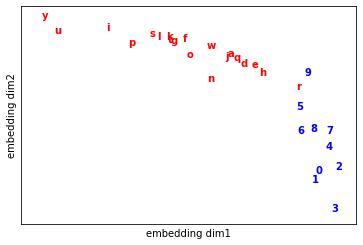

In [151]:
# [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)
from tensorflow import keras
import tensorflow as tf
from utils import process_w2v_data  # this refers to utils.py in my [repo](https://github.com/MorvanZhou/NLP-Tutorials/)
from visual import show_w2v_word_embedding  # this refers to visual.py in my [repo](https://github.com/MorvanZhou/NLP-Tutorials/)

corpus = [
    # numbers
    "5 2 4 8 6 2 3 6 4",
    "4 8 5 6 9 5 5 6",
    "1 1 5 2 3 3 8",
    "3 6 9 6 8 7 4 6 3",
    "8 9 9 6 1 4 3 4",
    "1 0 2 0 2 1 3 3 3 3 3",
    "9 3 3 0 1 4 7 8",
    "9 9 8 5 6 7 1 2 3 0 1 0",

    # alphabets, expecting that 9 is close to letters
    "a t g q e h 9 u f",
    "e q y u o i p s",
    "q o 9 p l k j o k k o p",
    "h g y i u t t a e q",
    "i k d q r e 9 e a d",
    "o p d g 9 s a f g a",
    "i u y g h k l a s w",
    "o l u y a o g f s",
    "o p i u y g d a s j d l",
    "u k i l o 9 l j s",
    "y g i s h k j l f r f",
    "i o h n 9 9 d 9 f a 9",
]


class CBOW(keras.Model):
    def __init__(self, v_dim, emb_dim):
        super().__init__()
        self.v_dim = v_dim
        self.embeddings = keras.layers.Embedding(
            input_dim=v_dim, output_dim=emb_dim,  # [n_vocab, emb_dim]
            embeddings_initializer=keras.initializers.RandomNormal(0., 0.1),
        )

        # noise-contrastive estimation
        self.nce_w = self.add_weight(
            name="nce_w", shape=[v_dim, emb_dim],
            initializer=keras.initializers.TruncatedNormal(0., 0.1))  # [n_vocab, emb_dim]
        self.nce_b = self.add_weight(
            name="nce_b", shape=(v_dim,),
            initializer=keras.initializers.Constant(0.1))  # [n_vocab, ]

        self.opt = keras.optimizers.Adam(0.01)

    def call(self, x, training=None, mask=None):
        # x.shape = [n, skip_window*2]
        o = self.embeddings(x)          # [n, skip_window*2, emb_dim]
        o = tf.reduce_mean(o, axis=1)   # [n, emb_dim]
        return o

    # negative sampling: take one positive label and num_sampled negative labels to compute the loss
    # in order to reduce the computation of full softmax
    def loss(self, x, y, training=None):
        embedded = self.call(x, training)
        return tf.reduce_mean(
            tf.nn.nce_loss(
                weights=self.nce_w, biases=self.nce_b, labels=tf.expand_dims(y, axis=1),
                inputs=embedded, num_sampled=5, num_classes=self.v_dim))

    def step(self, x, y):
        with tf.GradientTape() as tape:
            loss = self.loss(x, y, True)
            grads = tape.gradient(loss, self.trainable_variables)
        self.opt.apply_gradients(zip(grads, self.trainable_variables))
        return loss.numpy()


def train(model, data):
    for t in range(2500):
        bx, by = data.sample(8)
        loss = model.step(bx, by)
        if t % 200 == 0:
            print("step: {} | loss: {}".format(t, loss))


if __name__ == "__main__":
    d = process_w2v_data(corpus, skip_window=2, method="cbow")
    m = CBOW(d.num_word, 2)
    train(m, d)

    # plotting
    show_w2v_word_embedding(m, d, "./visual/results/cbow.png")

    